In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1jU38cWxHrKGLg1nWO_wW8031z7d1HpnO/view?usp=drive_link

id='1jU38cWxHrKGLg1nWO_wW8031z7d1HpnO'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('googleplaystore.csv')

In [ ]:
apps = pd.read_csv("googleplaystore.csv")

In [ ]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
apps.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [ ]:
apps["App"].duplicated().sum()
# Hay aplicaciones repetidas, las sacamos

1181

In [ ]:
apps1 = apps.drop_duplicates(subset = "App")
# Nos quedamos unicamente con la primer repeticion de aquellas Apps que se repiten
apps1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
apps1["App"].duplicated().sum()
# Los eliminamos correctamente

0

In [ ]:
apps1["Installs"].unique()
# Vemos que hay muchos valores de instalaciones, vamos a achicar esa cantidad. Primero sacamos aquellas apps que sus
# instalaciones sean 'Free', lo que es un error.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
apps2 = apps.drop(apps[apps["Installs"] == "Free"].index)
apps2["Installs"].unique()
# Las eliminamos correctamente

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# Nos quedamos la categoria como indice, las descargas de las apps como columnas, y como datos las cantidades de apps que corresponden
# a cada categoria
apps3 = apps2.pivot_table(values = "App", index = "Category", columns = "Installs", aggfunc = "count")
apps4 = apps3.fillna(0)
apps4

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0.0,1.0,0.0,3.0,4.0,0.0,0.0,11.0,5.0,1.0,...,0.0,0.0,5.0,3.0,0.0,6.0,1.0,0.0,6.0,0.0
AUTO_AND_VEHICLES,0.0,0.0,1.0,8.0,13.0,0.0,5.0,6.0,2.0,6.0,...,0.0,2.0,2.0,3.0,1.0,5.0,0.0,3.0,5.0,0.0
BEAUTY,0.0,0.0,0.0,1.0,8.0,0.0,0.0,13.0,1.0,5.0,...,0.0,0.0,3.0,1.0,1.0,5.0,0.0,1.0,6.0,0.0
BOOKS_AND_REFERENCE,0.0,0.0,1.0,34.0,20.0,1.0,19.0,25.0,24.0,7.0,...,6.0,7.0,16.0,10.0,3.0,12.0,0.0,9.0,17.0,0.0
BUSINESS,0.0,1.0,5.0,49.0,46.0,0.0,42.0,46.0,18.0,76.0,...,3.0,18.0,17.0,23.0,25.0,12.0,7.0,23.0,12.0,0.0
COMICS,0.0,0.0,0.0,1.0,12.0,0.0,0.0,11.0,2.0,1.0,...,0.0,0.0,5.0,4.0,1.0,7.0,0.0,0.0,5.0,0.0
COMMUNICATION,0.0,0.0,1.0,22.0,45.0,19.0,19.0,25.0,57.0,33.0,...,39.0,2.0,19.0,25.0,5.0,10.0,10.0,11.0,9.0,17.0
DATING,0.0,0.0,2.0,17.0,32.0,0.0,10.0,27.0,17.0,19.0,...,0.0,1.0,13.0,9.0,6.0,5.0,0.0,13.0,26.0,0.0
EDUCATION,0.0,0.0,0.0,2.0,52.0,0.0,0.0,5.0,30.0,0.0,...,4.0,0.0,0.0,22.0,0.0,6.0,0.0,0.0,14.0,0.0


In [ ]:
# El criterio que vamos a usar es: aquellas descargas cuyo valor comience por el numero 1, redondeamos al valor menor mas cercano
# que arranque por 5 (por ej de 1.000.000.000+ a 500.000.000+), y aquellos valores menores a 50, los redondeamos a 50+.
# Una vez sumados, corroboramos que la suma sea correcta.
suma1 = apps4["50+"].sum() + apps4["0"].sum() + apps4["0+"].sum() + apps4["1+"].sum() + apps4["5+"].sum() + apps4["10+"].sum() + apps4["100+"].sum()
suma2 = apps4["500+"].sum() + apps4["1,000+"].sum()
suma3 = apps4["5,000+"].sum() + apps4["10,000+"].sum()
suma4 = apps4["50,000+"].sum() + apps4["100,000+"].sum()
suma5 = apps4["500,000+"].sum() + apps4["1,000,000+"].sum()
suma6 = apps4["5,000,000+"].sum() + apps4["10,000,000+"].sum()
suma7 = apps4["50,000,000+"].sum() + apps4["100,000,000+"].sum()
suma8 = apps4["500,000,000+"].sum() + apps4["1,000,000,000+"].sum()

apps5 = apps4.copy()
apps5["50+"] = apps5["50+"] + apps5["0"] + apps5["0+"] + apps5["1+"] + apps5["5+"] + apps5["10+"] + apps5["100+"]
apps5["500+"] += apps5["1,000+"]
apps5["5,000+"] += apps5["10,000+"]
apps5["50,000+"] += apps5["100,000+"]
apps5["500,000+"] += apps5["1,000,000+"]
apps5["5,000,000+"] += apps5["10,000,000+"]
apps5["50,000,000+"] += apps5["100,000,000+"]
apps5["500,000,000+"] += apps5["1,000,000,000+"]

[(apps5["50+"].sum() == suma1) & (apps5["500+"].sum() == suma2) & (apps5["5,000+"].sum() == suma3) & (apps5["50,000+"].sum() == suma4) &
(apps5["500,000+"].sum() == suma5) & (apps5["5,000,000+"].sum() == suma6) & (apps5["50,000,000+"].sum() == suma7) &
(apps5["500,000,000+"].sum() == suma8)]

[True]

In [ ]:
columnas_a_eliminar = ["0", "0+", "1+", "5+", "10+", "100+", "1,000+", "10,000+", "100,000+",
                       "1,000,000+", "10,000,000+", "100,000,000+", "1,000,000,000+"]
apps6 = apps5.drop(columnas_a_eliminar, axis = 1)
apps6

Installs,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,
ART_AND_DESIGN,16.0,8.0,2.0,25.0,1.0,3.0,10.0,0.0
AUTO_AND_VEHICLES,8.0,5.0,15.0,28.0,0.0,11.0,18.0,0.0
BEAUTY,16.0,2.0,6.0,13.0,0.0,2.0,14.0,0.0
BOOKS_AND_REFERENCE,41.0,34.0,37.0,32.0,6.0,43.0,37.0,1.0
BUSINESS,63.0,41.0,167.0,49.0,10.0,72.0,58.0,0.0
COMICS,16.0,6.0,2.0,18.0,0.0,1.0,17.0,0.0
COMMUNICATION,44.0,82.0,60.0,29.0,49.0,33.0,54.0,36.0
DATING,40.0,26.0,38.0,42.0,0.0,30.0,58.0,0.0
EDUCATION,5.0,52.0,0.0,27.0,4.0,2.0,66.0,0.0


In [ ]:
# Solo quedan los ultimos retoques: ordenar las instalaciones de menor a mayor, y quedarnos con aquellas 10 filas cuya cantidad
# total sea la mayor entre las demas.
nombres = apps6.columns.tolist()
nombres_sorted = sorted(nombres, key= lambda x: int(x.replace(',', '').rstrip('+')))
apps7 = apps6[nombres_sorted]
apps8 = apps7.copy()
apps8["Total"] = apps8.sum(axis=1)
apps9 = apps8.nlargest(10, "Total").drop("Total", axis=1)
apps9

Installs,50+,500+,"5,000+","50,000+","500,000+","5,000,000+","50,000,000+","500,000,000+"
Category,,,,,,,,
FAMILY,232.0,284.0,339.0,357.0,384.0,301.0,71.0,4.0
GAME,60.0,52.0,81.0,152.0,228.0,330.0,218.0,23.0
TOOLS,107.0,119.0,153.0,149.0,127.0,128.0,49.0,11.0
MEDICAL,134.0,101.0,104.0,83.0,38.0,3.0,0.0,0.0
BUSINESS,167.0,72.0,63.0,49.0,58.0,41.0,10.0,0.0
PRODUCTIVITY,80.0,49.0,31.0,52.0,74.0,72.0,52.0,14.0
PERSONALIZATION,87.0,57.0,62.0,41.0,66.0,57.0,22.0,0.0
COMMUNICATION,60.0,33.0,44.0,29.0,54.0,82.0,49.0,36.0
SPORTS,63.0,31.0,45.0,55.0,69.0,107.0,14.0,0.0


In [ ]:
# Convertimos los valores a enteros
apps10 = apps9.astype(int)
apps10

Installs,50+,500+,"5,000+","50,000+","500,000+","5,000,000+","50,000,000+","500,000,000+"
Category,,,,,,,,
FAMILY,232,284,339,357,384,301,71,4
GAME,60,52,81,152,228,330,218,23
TOOLS,107,119,153,149,127,128,49,11
MEDICAL,134,101,104,83,38,3,0,0
BUSINESS,167,72,63,49,58,41,10,0
PRODUCTIVITY,80,49,31,52,74,72,52,14
PERSONALIZATION,87,57,62,41,66,57,22,0
COMMUNICATION,60,33,44,29,54,82,49,36
SPORTS,63,31,45,55,69,107,14,0


Text(0.5, 23.52222222222222, 'Cantidad de descargas')

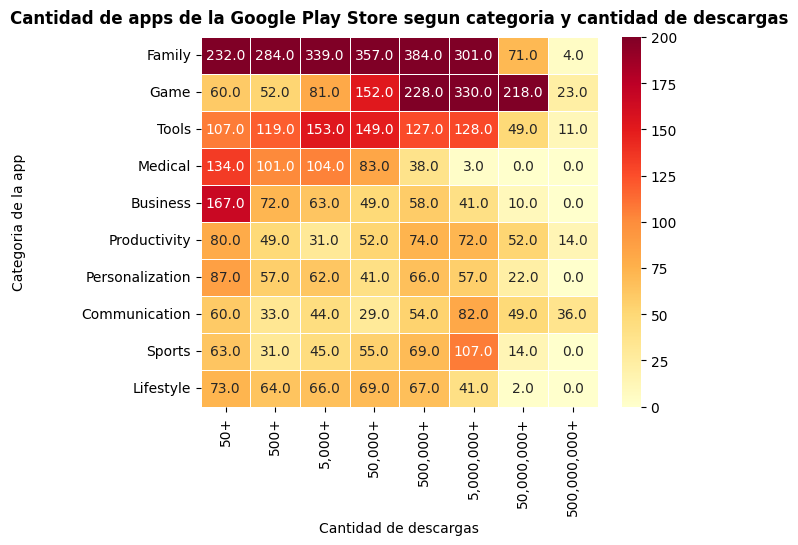

In [ ]:
# Por ultimo construimos nuestro heatmap
apps10.index = apps10.index.str.lower().str.capitalize()
sns.heatmap(apps10, linewidth = .5 , annot = True, fmt = ".1f", cmap = "YlOrRd", vmin = 0, vmax=200)
plt.title("Cantidad de apps de la Google Play Store segun categoria y cantidad de descargas", fontweight = 'bold', pad = 10)
plt.ylabel("Categoria de la app", labelpad = 40)
plt.xlabel("Cantidad de descargas")